In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import pickle
sns.set_style("ticks")
hfont = {'fontname':'Myriad Pro'}
import matplotlib.ticker as mtick
from matplotlib import gridspec
from matplotlib import colors
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn

In [2]:
from lmfit import Model
from lmfit.models import LinearModel

In [3]:
model_lm = LinearModel()

In [4]:
colorlist = ["windows blue", "faded green", "dusty purple"]
sns.set_palette = sns.xkcd_palette(colorlist)
cmap_all  = colors.ListedColormap(sns.xkcd_palette(colorlist)) #s# 
cmap_pal = sns.xkcd_palette(colorlist)

In [5]:
path = Path(os.getcwd()).parents[0]

modelpath = os.path.join(path, 'multireg')
hfn.dir_check(modelpath)

linpath = os.path.join(modelpath, 'lin_scale')
hfn.dir_check(linpath)

linpath_df = os.path.join(linpath, 'DF')

logpath = os.path.join(modelpath, 'log_scale')
hfn.dir_check(logpath)

logpath_df = os.path.join(logpath, 'DF')


In [6]:
fracpath = os.path.join(path, 'input_fraction')

fracpath_csv = os.path.join(fracpath, 'csv')

In [7]:
figpath = os.path.join(path, 'Figures')
hfn.dir_check(figpath)
    
fig4path = os.path.join(figpath, 'Fig4')
hfn.dir_check(fig4path)
    
fig4panelspath = os.path.join(fig4path, 'panels')
hfn.dir_check(fig4panelspath)

# Load data

In [8]:
list_r2_log_filt = pd.read_hdf(os.path.join(logpath_df, 'multireg_results_linear_allstarters.h5'))

# plot panel A

In [9]:
def plot_multivar(list_res, figname):

    f, ax = plt.subplots(figsize=(7, 7)) 
    list_res.plot(kind='bar', ax = ax, width = 0.8, cmap = cmap_all)
    plt.ylabel('$r^2$')
    plt.legend(fontsize = 14)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)    
    plt.ylim(0,0.9)
        

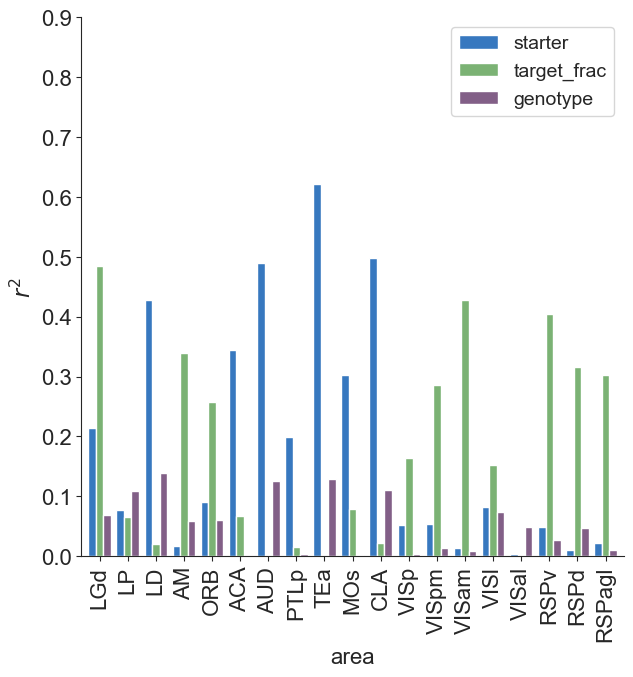

In [10]:
plot_multivar(list_r2_log_filt[['starter', 'target_frac', 'genotype']], 'log scale, single factors, all')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


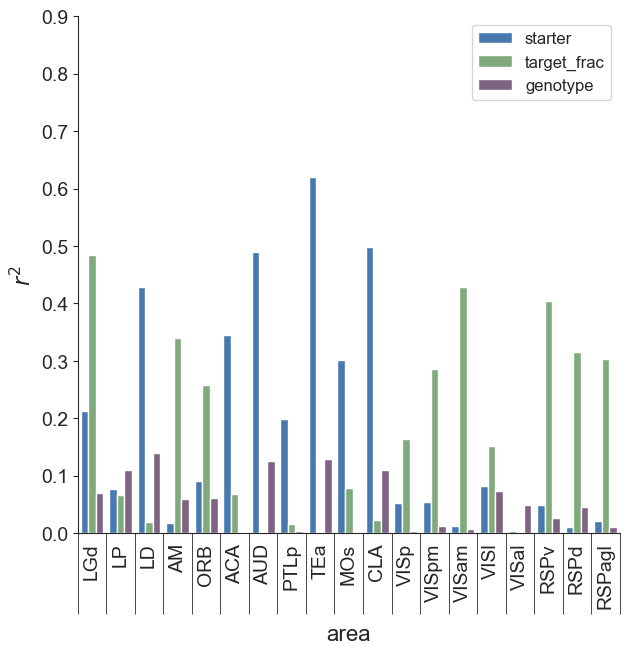

In [11]:
sns.set_style("ticks")

list_res1 = list_r2_log_filt[['starter', 'target_frac', 'genotype']]
list_res_cat = pd.DataFrame(list_res1.stack(),columns = ['r2'])
list_res_cat.index = list_res_cat.index.set_names(['area', 'feature'])
list_res_cat.reset_index(inplace = True)
c = sns.catplot(data = list_res_cat, y = 'r2', x = 'area', hue = 'feature', kind = 'bar', palette = cmap_pal)#.index

c._legend.remove()
plt.xticks(rotation=90)
# list_res1.plot(kind='bar', ax = ax1, width = 1, cmap = cmap_all)
c.axes.flatten()[0].set_ylabel('$r^2$', fontsize = 16)
c.axes.flatten()[0].set_xlabel('area', fontsize = 16)
plt.legend(fontsize = 12)   
c.axes.flatten()[0].set_ylim(0,0.9)

for label in (c.axes.flatten()[0].get_yticklabels() + c.axes.flatten()[0].get_xticklabels()):
    label.set_fontsize(14)


plt.xticks(np.arange(len(list_res_cat['area'].unique())), list_res_cat['area'].unique(), rotation=90)
c.axes.flatten()[0].xaxis.set_minor_locator(mtick.MultipleLocator(0.5))
c.axes.flatten()[0].tick_params(which='minor', length=58)

for tick in c.axes.flatten()[0].xaxis.get_major_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
    
plt.gcf().set_size_inches(8, 6.)

plt.savefig(os.path.join(fig4panelspath, 'fig4a.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(fig4panelspath, 'fig4a.eps'), bbox_inches = 'tight', format = 'eps', dpi = 200)

# plot panel B

In [12]:
df_frac = pd.read_csv(os.path.join(fracpath_csv, 'df_all_fraction.csv'))

In [13]:
areas_sel = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'LGd', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD',]

In [14]:
allparams_l = []

for area in areas_sel:
    thisdf = df_frac[['starter', area]]
    thissubdf = thisdf[thisdf.starter<200]
    datax = thissubdf.starter.values
    datay = thissubdf[area].values
    pars = model_lm.guess(datay, x = datax)
    result = model_lm.fit(datay, pars, x = datax)
    thisparams = {'area':area, 'slope':result.params['slope'].value, 'intercept':result.params['intercept'].value}
    allparams_l.append(thisparams)
    
pars_df_l = pd.DataFrame(allparams_l)

In [15]:
allparams_h = []

for area in areas_sel:
    thisdf = df_frac[['starter', area]]
    thissubdf = thisdf[thisdf.starter>200]
    datax = thissubdf.starter.values
    datay = thissubdf[area].values
    pars = model_lm.guess(datay, x = datax)
    result = model_lm.fit(datay, pars, x = datax)
    thisparams = {'area':area, 'slope':result.params['slope'].value, 'intercept':result.params['intercept'].value}
    allparams_h.append(thisparams)
    
pars_df_h = pd.DataFrame(allparams_h)

In [16]:
allparams= []

for area in areas_sel:
    thisdf = df_frac[['starter', area]]
    thissubdf = thisdf.copy()
    datax = thissubdf.starter.values
    datay = thissubdf[area].values
    pars = model_lm.guess(datay, x = datax)
    result = model_lm.fit(datay, pars, x = datax)
    thisparams = {'area':area, 'slope':result.params['slope'].value, 'intercept':result.params['intercept'].value}
    allparams.append(thisparams)
    
pars_df = pd.DataFrame(allparams)

In [17]:
pars_df.to_hdf(os.path.join(fracpath, 'linfit_pars.h5'), key = 'pars', mode = 'w')
pars_df_l.to_hdf(os.path.join(fracpath, 'linfit_pars_lowstarters.h5'), key = 'pars', mode = 'w')
pars_df_h.to_hdf(os.path.join(fracpath, 'linfit_pars_highstarters.h5'), key = 'pars', mode = 'w')

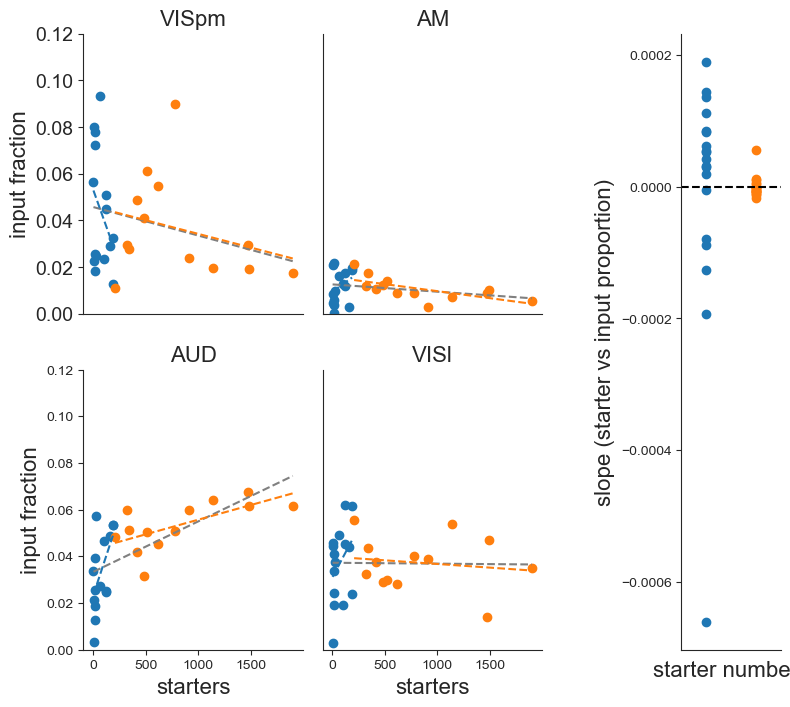

In [18]:
f1 = plt.figure(figsize = (9,7))

thisdf_l= df_frac[df_frac.starter<200]
thisdf_h= df_frac[df_frac.starter>200]


gs = f1.add_gridspec(2,6)

    # panel A
ax1 = f1.add_subplot(gs[:1, 0:2])
thisarea = 'VISpm'
thispars = pars_df[pars_df.area == thisarea]
thispars_l = pars_df_l[pars_df_l.area == thisarea]
thispars_h = pars_df_h[pars_df_h.area == thisarea]
ax1.scatter(thisdf_l['starter'], thisdf_l[thisarea])
ax1.scatter(thisdf_h['starter'], thisdf_h[thisarea])
ax1.plot(thisdf['starter'],thispars['slope'].values * thisdf['starter'] + thispars['intercept'].values, ls = '--', c = 'grey')
ax1.plot(thisdf_l['starter'],thispars_l['slope'].values * thisdf_l['starter'] + thispars_l['intercept'].values, ls = '--', c = 'C0')
ax1.plot(thisdf_h['starter'],thispars_h['slope'].values * thisdf_h['starter'] + thispars_h['intercept'].values, ls = '--', c = 'C1')
ax1.xaxis.set_visible(False)
ax1.set_title(thisarea, fontsize = 16)
ax1.set_ylabel('input fraction', fontsize = 16)
ax1.set_ylim(-0, 0.12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = f1.add_subplot(gs[:1, 2:4])
thisarea = 'AM'
thispars = pars_df[pars_df.area == thisarea]
thispars_l = pars_df_l[pars_df_l.area == thisarea]
thispars_h = pars_df_h[pars_df_h.area == thisarea]
ax2.scatter(thisdf_l['starter'], thisdf_l[thisarea])
ax2.scatter(thisdf_h['starter'], thisdf_h[thisarea])
ax2.plot(thisdf['starter'],thispars['slope'].values * thisdf['starter'] + thispars['intercept'].values, ls = '--', c = 'grey')
ax2.plot(thisdf_l['starter'],thispars_l['slope'].values * thisdf_l['starter'] + thispars_l['intercept'].values, ls = '--', c = 'C0')
ax2.plot(thisdf_h['starter'],thispars_h['slope'].values * thisdf_h['starter'] + thispars_h['intercept'].values, ls = '--', c = 'C1')
ax2.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)#ax2.set_xticklabels([])
ax2.set_title(thisarea, fontsize = 16)
# ax2.set_ylabel('input fraction', fontsize = 16)
ax2.set_ylim(-0, 0.12)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = f1.add_subplot(gs[1:2, :2])
thisarea = 'AUD'
thispars = pars_df[pars_df.area == thisarea]
thispars_l = pars_df_l[pars_df_l.area == thisarea]
thispars_h = pars_df_h[pars_df_h.area == thisarea]
ax3.scatter(thisdf_l['starter'], thisdf_l[thisarea])
ax3.scatter(thisdf_h['starter'], thisdf_h[thisarea])
ax3.plot(thisdf['starter'],thispars['slope'].values * thisdf['starter'] + thispars['intercept'].values, ls = '--', c = 'grey')
ax3.plot(thisdf_l['starter'],thispars_l['slope'].values * thisdf_l['starter'] + thispars_l['intercept'].values, ls = '--', c = 'C0')
ax3.plot(thisdf_h['starter'],thispars_h['slope'].values * thisdf_h['starter'] + thispars_h['intercept'].values, ls = '--', c = 'C1')
ax3.set_xlabel('starters', fontsize = 16)
ax3.set_title(thisarea, fontsize = 16)
ax3.set_ylabel('input fraction', fontsize = 16)
ax3.set_ylim(-0, 0.12)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


ax4 = f1.add_subplot(gs[1:2, 2:4])
thisarea = 'VISl'
thispars = pars_df[pars_df.area == thisarea]
thispars_l = pars_df_l[pars_df_l.area == thisarea]
thispars_h = pars_df_h[pars_df_h.area == thisarea]
ax4.scatter(thisdf_l['starter'], thisdf_l[thisarea])
ax4.scatter(thisdf_h['starter'], thisdf_h[thisarea])
ax4.plot(thisdf['starter'],thispars['slope'].values * thisdf['starter'] + thispars['intercept'].values, ls = '--', c = 'grey')
ax4.plot(thisdf_l['starter'],thispars_l['slope'].values * thisdf_l['starter'] + thispars_l['intercept'].values, ls = '--', c = 'C0')
ax4.plot(thisdf_h['starter'],thispars_h['slope'].values * thisdf_h['starter'] + thispars_h['intercept'].values, ls = '--', c = 'C1')
ax4.yaxis.set_visible(False)
ax4.set_xlabel('starters', fontsize = 16)
ax4.set_title(thisarea, fontsize = 16)
ax4.set_ylim(-0, 0.12)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)


ax5 = f1.add_subplot(gs[:, 5:6])
ax5.plot(np.zeros(pars_df_l[['slope']].shape[0]),pars_df_l[['slope']],'o')

ax5.plot(np.ones(pars_df_h[['slope']].shape[0]),pars_df_h[['slope']],'o')

ax5.set_ylabel('slope (starter vs input proportion)', fontsize = 16)
ax5.set_xlim(-0.5, 1.5)
ax5.axhline(0,c= 'k', ls= '--')

ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.get_xaxis().set_ticks([])
for label in (ax1.get_yticklabels() + ax2.get_xticklabels()):
    label.set_fontsize(14)
ax5.set_xlabel('starter numbers', fontsize = 16)

plt.gcf().set_size_inches(9, 8)
plt.savefig(os.path.join(fig4panelspath, 'fig4b-c.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(fig4panelspath, 'fig4b-c.eps'), bbox_inches = 'tight', format = 'eps', dpi = 200)

#### plot panel C

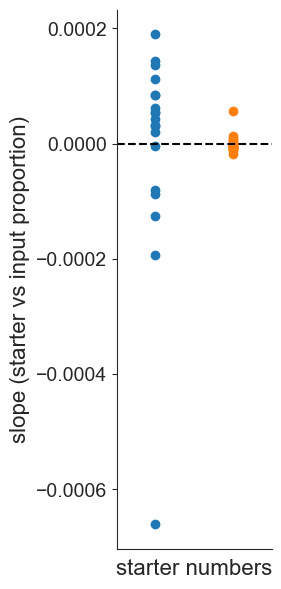

In [19]:
f = plt.figure(figsize = (2, 7))
plt.plot(np.zeros(pars_df_l[['slope']].shape[0]),pars_df_l[['slope']],'o')

plt.plot(np.ones(pars_df_h[['slope']].shape[0]),pars_df_h[['slope']],'o')

plt.ylabel('slope (starter vs input proportion)', fontsize = 16)
plt.xlim(-0.5, 1.5)
plt.axhline(0,c= 'k', ls= '--')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_xaxis().set_ticks([])
for label in (ax.get_yticklabels() + ax.get_xticklabels()):
    label.set_fontsize(14)
plt.xlabel('starter numbers', fontsize = 16)
f.set_size_inches(2, 7)
plt.savefig(os.path.join(fig4panelspath, 'fig4c.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(fig4panelspath, 'fig4c.eps'), bbox_inches = 'tight', format = 'eps', dpi = 200)